$$
\def\CC{\bf C}
\def\QQ{\bf Q}
\def\RR{\bf R}
\def\ZZ{\bf Z}
\def\NN{\bf N}
$$
# Práctica nº 3. Matemáticas I de Ingeniería Informática

En esta práctica completaremos el estudio de series que comenzamos brevemente en la práctica 2, haremos algunos ejercicios sobre números complejos y empezaremos a estudiar funciones de variable real. Contenido:

-   Series: convergencia y suma
-   Funciones: introducción, generalidades y gráficas

## 0. Sumas finitas y series.

Sage efectúa sumas de un número finito de términos con la orden sum. Por ejemplo, la siguiente orden calcula $$\sum_{n=1}^{10} 2^n$$

In [ ]:
reset()
var('n')
sum(2^n,n,1,10)

**Ejemplo.** Comprobar, con variables simbólicas, que Sage conoce la fórmula del binomio de Newton $\displaystyle \sum_{k=0}^n\binom{n}{k}a^k b^{n-k}=(a+b)^n$.

In [ ]:
reset()
var('a b k n')
show(sum(binomial(n,k)*a^k*b^(n-k),k,0,n))

Una suma con infinitos términos es lo que en Matemáticas se llama serie. La serie por definición es el límite de las sumas parciales, es decir,

$$\sum_{k=1}^\infty a_k=\lim_{n\to\infty} \sum_{k=1}^n a_k,$$

y el límite puede ser finito, $+\infty$, $-\infty$ o no existir. Sage sabe hacer este límite en algunos casos con la misma orden sum poniendo sum(a(k),k,1,oo). En otros no lo sabrá hacer, pero como sí sabe hacer sumas finitas de muchísimos sumandos, siempre nos puede ser útil. Veamos unos últimos ejemplos sobre sumas y series.


**Ejemplo.** Sumar la serie $\displaystyle \sum_{k=1}^\infty\frac{1}{k(k+1)}$ y comprobar que es el límite de las sumas parciales.

In [1]:
reset()
var('k')
sum(1/(k*(k+1)),k,1,oo) # la suma es 1

1

In [2]:
var('n')
s(n)=sum(1/(k*(k+1)),k,1,n)
s(n) # ha sabido sumar y simplificar cada suma parcial

n/(n + 1)

In [3]:
lim(s(n),n=oo) # comprobado

1

**Ejemplo 1.** Tratar de ver si es convergente y de hallar la suma de la serie $\displaystyle \sum_{k=1}^\infty\frac{\sqrt{k+1}-\sqrt{k}}{\sqrt{k(k+1)}}$.

In [4]:
reset()
var('k')
sum((sqrt(k+1)-sqrt(k))/sqrt(k*(k+1)),k,1,oo)

sum((sqrt(k + 1) - sqrt(k))/sqrt(k^2 + k), k, 1, +Infinity)

In [5]:
var('n')
s(n)=sum((sqrt(k+1)-sqrt(k))/sqrt(k*(k+1)),k,1,n)
s(n).full_simplify()

sum((sqrt(k + 1) - sqrt(k))/sqrt(k^2 + k), k, 1, n)

Como no sabe hacer las sumas parciales, no sabrá hacer el límite. Vamos a formar una lista con las 50 sumas parciales y dibujar los valores. Para ello, podemos utilizar el comando list_plot:

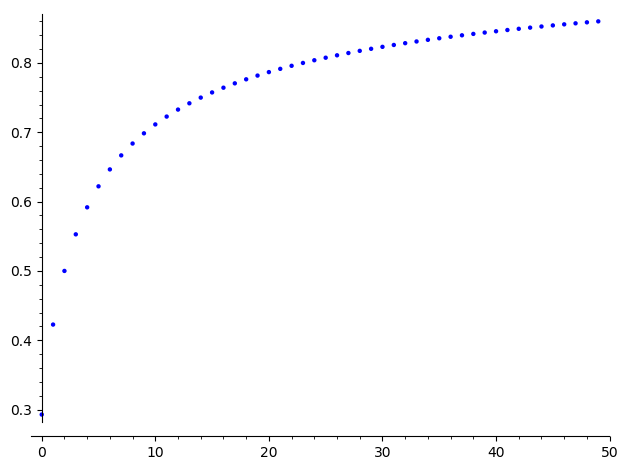

In [6]:
L=[sum((sqrt(k + 1) - sqrt(k))/sqrt(k*(k+1)), k, 1, n) for n in [1..50]]
list_plot(L)

Esto nos puede dar una idea de que la serie converge, las sumas parciales parece que crecen lentamente y que permanecerán acotadas. Podemos tomar más términos para verlo mejor, por ejemplo $500$, pero aquí nos aparece un problema de tipo computacional. Si ponemos

list\_plot(\[sum((sqrt(k + 1) - sqrt(k))/sqrt(k\*(k+1)), k, 1, n) for n in \[1..500\]\])

observaremos que tarda mucho en hacer el cálculo. Es mejor (más rápido), crear una lista con las sumas parciales hasta la suma parcial de orden $500$, por medio de un bucle con append, de forma similar a lo hecho con sucesiones recurrentes:

In [7]:

a(k)=(sqrt(k+1)-sqrt(k))/sqrt(k*(k+1)) # término general
c=500
H=[0]
for k in [1..c]:
   H.append(H[k-1]+a(k))
A=list_plot([H[n] for n in [1..c]],figsize=4)

Ahora H es una lista de $501$ términos, cuyo primer término es cero y los siguientes son las sumas parciales de la serie desde $1$ hasta $500$. Dibujamos H con la línea $y=1$ :

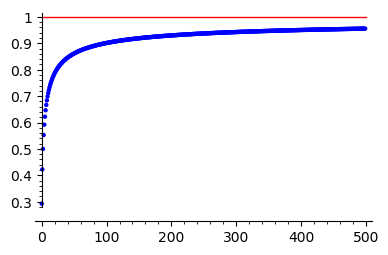

In [8]:
B=plot(1,x,0,500,color='red')
A+B

Tomando más términos (aunque los cálculos llevarían mucho tiempo) veríamos que las sumas parciales se acercan a $1$. De todas formas, Sage no se da cuenta de lo que sí podemos ver nosotros con una simple operación. La serie es telescópica:

$$\sum_{k=1}^n\frac{\sqrt{k+1}-\sqrt{k}}{\sqrt{k(k+1)}}=\sum_{k=1}^n\left(\frac{1}{\sqrt{k}}-\frac{1}{\sqrt{k+1}}\right)=1-\frac{1}{\sqrt{n+1}}.$$

Y, ahora, es inmediato que el límite es $1$.

## 1. Series: convergencia y suma

Recordamos las órdenes:

-   sum(a(n),n,1,m) , calcula la suma finita $\displaystyle \sum_{n=1}^m a(n)$.
-   sum(a(n),n,1,oo) , calcula la suma de la serie $\displaystyle \sum_{n=1}^\infty a(n)$.

**Lo principal sobre sucesiones.** Antes de manejar series, recordamos lo básico sobre sucesiones: para introducir una sucesión $a_n$ lo más sencillo es usar la sintaxis

a(n)= $\cdots$

Para hallar su límite, intentamos la orden

lim(a(n),n=oo)

Si queremos introducir un número finito de términos en una lista (por ejemplo los términos desde $1$ hasta $100$) hacemos

L=\[a(n) for n in \[1..100\]\]

y si queremos dibujar estos términos, hacemos

list\_plot(L,opciones)

o bien

point(\[(n,a(n)) for n in \[1..100\]\], opciones)

donde en opciones ponemos separados por comas, atributos del dibujo como color, tamaño de la figura, etc.

En los ejemplos de series que siguen recordamos algún criterio de convergencia, pero convendría repasar o tener a mano lo que se ha visto en clase sobre series.

**Ejemplo 2:** Estudia el carácter de la serie $\displaystyle \sum_{n=1}^{\infty}\frac{n^n}{n!}$

Para este ejemplo usamos el criterio del cociente: si $\displaystyle \lim_{n\to \infty} \left|\frac{a(n+1)}{a(n)}\right| =L$ y $L<1$ entonces $\displaystyle \sum_{n=1}^\infty a(n)$ es convergente; si $L>1$ no es convergente y si $L=1$ es un caso dudoso, hay ejemplos en los que converge y otros en los que no converge y para salir de dudas habrá que recurrir a otros métodos.

In [9]:
reset()
var('n')
a(n)=n^n/factorial(n)
show(a(n))

n^n/factorial(n)

In [10]:
L=lim(a(n+1)/a(n),n=oo)
L.show() # como e>1, la serie diverge

e

**Ejemplo 3:** Estudia el carácter de la serie $\displaystyle \sum_{n= 1}^\infty \frac{n+1}{n(n+2)(n+3)}$

Usamos primero el criterio del cociente.

In [11]:
reset()
var('n')
a(n)=(n+1)/(n*(n+2)*(n+3))
L=lim(a(n+1)/a(n),n=oo)
L # vemos que L=1: caso dudoso

1

Para resolver la duda, usamos el criterio de comparación: si $\displaystyle \lim_{n\to \infty}  \frac{a(n)}{b(n)}=L\in (0,+\infty)$ entonces las series $\displaystyle \sum_{n=1}^\infty a(n)$ y $\displaystyle \sum_{n=1}^\infty b(n)$ convergen o divergen simultáneamente.

En este caso comparamos con la serie $\displaystyle\sum_{n= 1}^\infty \frac{1}{n^2 }$

In [12]:
lim(a(n)/(1/n^2),n=oo)

1

Como la serie  $\displaystyle\sum_{n= 1}^\infty \frac{1}{n^2 }$ converge, la nuestra también.



**Introducción de las sumas parciales.** Recordamos también el siguiente procedimiento para formar unas cuantas sumas parciales, interesante cuando no sabe hallarlas para un $n$ genérico: si queremos formar una lista (la llamamos s) con las 50 primeras sumas parciales, $s_1=a_1$, $s_2=a_1+a_2$, $\dots$, observando que $s_n=s_{n-1}+a_n$, lo podemos hacer así:

a(n)=término general

s=\[0\]

for n in \[1..50\]:

> s.append(s\[n-1\]+a(n))

Así hemos formado una lista donde el primer elemento es s\[0\]= $0$ y los siguientes son s\[n\]= $s_n$.

**Ejemplo 4:** Sea la serie armónica $\displaystyle \sum_{n=1}^\infty\frac{1}{n}$. Dibujar las sumas parciales de esta serie, $H_N=\displaystyle \sum_{n=1}^N\frac{1}{n}$, y comprobar que van por encima de $\log N$. Esto hace sospechar que la serie es divergente.

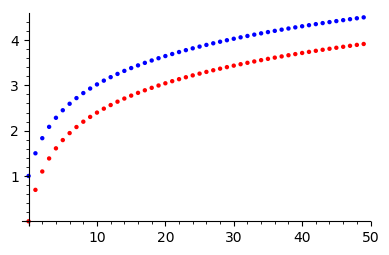

In [13]:
reset()
c=50
H=[0]
for n in [1..c]:
    H.append(H[n-1]+1/n) 
A=list_plot([H[n] for n in [1..c]],figsize=4) 
B=list_plot([log(n) for n in [1..c]],color='red',figsize=4)
A+B

**Nota.-** Es conocido que existe $\displaystyle \lim_{N\to\infty}\left(\sum_{n=1}^N\frac1n-\log N\right)$. Este límite es un número muy famoso en matemáticas que se llama constante de Euler, se denota $\gamma$ y se sabe que $\gamma\sim 0,577$ (Sage lo tiene en memoria y se obtiene con la orden euler\_gamma). Podemos comprobar gráficamente que estas diferencias se acercan a dicho número, dibujándolas junto a la línea horizontal de altura $\gamma$ :

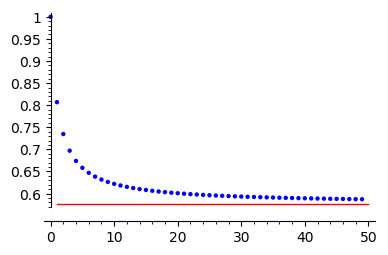

In [14]:
D=[H[n]-log(n) for n in [1..c]]
dif=list_plot(D)
linea=plot(euler_gamma,(x,1,50),color='red')
show(dif+linea,figsize=4)

In [15]:
N(euler_gamma,digits=50)

0.57721566490153286060651209008240243104215933593992

**Suma de series.** Con la orden sum(a(n),n,1,oo) , Sage suma algunas series (y para algunas otras sabe, con esta orden, que no son convergentes). Por ejemplo, sumemos la serie $\displaystyle\sum_{n= 1}^\infty \frac{n^2+3n+1}{n^2 (n+1)^2}$

In [16]:
var('n')
sum((n^2+3*n+1)/(n^2*(n+1)^2),n,1,oo)

2

Si tenemos una serie divergente, en algunos casos Sage detecta con esta orden que efectivamente lo es, pero en otros casos (la mayoría) nos devuelve la expresión:

In [17]:
sum(1/n,n,1,oo) # Sage sabe que esta serie
                # es divergente

ValueError: Sum is divergent.

In [18]:
sum(n^(1/2),n,1,oo)  # serie claramente divergente,
                     # pero Sage no lo sabe

sum(sqrt(n), n, 1, +Infinity)

Sage no sabe sumar toda serie convergente, en parte porque no toda serie se puede sumar por métodos elementales y en parte porque Sage puede que no vea alguna simplificación sobre el término general, importante para hallar la suma.

**Ejemplo 5:** Sea $0<c<1$. Probar que la serie $\displaystyle \sum_{n=1}^\infty nc^n$ es convergente y que su suma es $\displaystyle \frac{c}{(c-1)^2}$.

In [21]:
reset()
var('c n')
a(n)=n*c^n
L=limit(a(n+1)/a(n),n=oo)
print(L) # como L=c<1, es convergente
sum(a(n),n,1,oo).show()

c


c/(c^2 - 2*c + 1)

Observar que esta serie no converge si $c\geq 1$, pero ni Sage ni nosotros lo hemos dicho explícitamente. Por tanto, debemos tener cuidado en sumas como estas donde aparecen parámetros.

## 3. Funciones: introducción, generalidades y gráficas

Contenido:

-   Definir funciones
-   Gráficas: repasando la orden plot

Una de las mejores maneras de definir una función de variable real es con la sencilla sintaxis f(x)= $\cdots$ . Por ejemplo, introducimos la función $f(x)=x^3+2x+1$.

In [22]:
f(x)=x^3+2*x+1

Comprobamos con la orden show que la función $f$ está definida y que no nos hemos equivocado al escribir:

In [23]:
f(x).show()

x^3 + 2*x + 1

Definimos ahora la función $h(t) = t \ln t$ :

In [24]:
var('t')     # si se quiere, no es necesario
h(t)=t*ln(t) # declarar t como variable
h(t).show()

t*log(t)

Con esta sintaxis la evaluación de funciones en puntos, o en otras variables (siempre que estén declaradas), es muy sencilla:

In [26]:
print(h(5))
print(f(-x))
print(f(h(t)))

5*log(5)
-x^3 - 2*x + 1
t^3*log(t)^3 + 2*t*log(t) + 1


Para dibujar usamos la orden plot que tiene numerosas opciones, algunas de las cuales hemos usado con anterioridad. Aquí repasamos con algunos ejemplos: primero, dibujaremos la gráfica de la función $f(x) = (x^2-1)/(x^2+1)$ para $x$ entre $-2$ y $5$, y con la opción figsize indicamos el tamaño del dibujo (la opción por defecto es figsize=8):

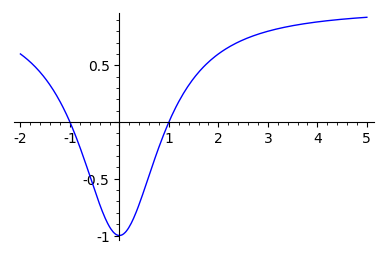

In [27]:
reset()
f(x)=(x^2-1)/(x^2+1)
plot(f(x),(x,-2,5),figsize=4)

Representamos ahora la función $\displaystyle f(x) = \frac{x}{x^3-1}$ con $x$ entre $-1$ y $3$ :

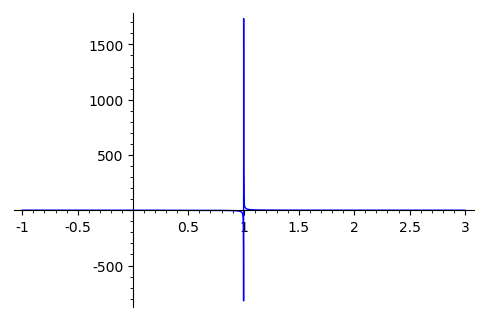

In [28]:
reset()
f(x)=x/(x^3-1)
plot(f(x),(x,-1,3),figsize=5)

No se distingue nada. ¿Qué ha ocurrido? Sage intenta representar toda la función, pero cuando $x$ está cerca de $1$ esta función toma valores muy grandes (positivos o negativos); observemos la escala del eje vertical.

Podemos evitar esto si limitamos los valores del eje vertical; para lo cual tenemos las opciones ymin e ymax:

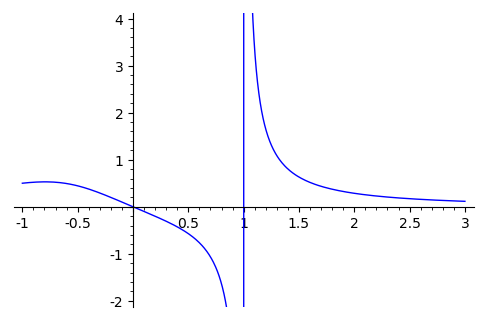

In [29]:
plot(f(x),(x,-1,3),figsize=5,ymin=-2,ymax=4)

La línea vertical en realidad no es parte de la gráfica. Podemos evitar que aparezca con la opción detect\_poles='True'. Con detect\_poles='show', aparecerá una linea discontinua:

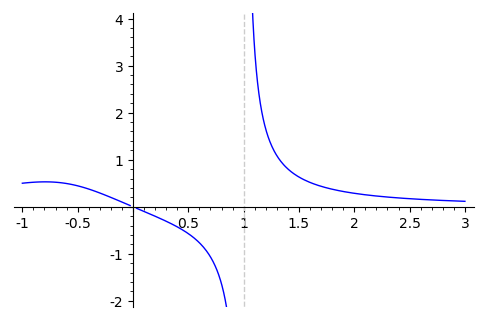

In [30]:
plot(f(x),(x,-1,3),ymin=-2,ymax=4,figsize=5,detect_poles='show')

Otras opciones útiles son:

-   aspect\_ratio=1 , que fuerza a emplear la misma escala en los dos ejes;
-   color='red' , que indica el color, en este caso rojo, de la curva;
-   linestyle='dashed' , que indica el trazo, en este caso discontinuo, de la curva.

Para representar dos o más funciones juntas (en realidad, para hacer dos o más gráficas juntas) lo mejor es dar un nombre a cada plot y luego juntarlos con el símbolo +. Por ejemplo, llamamos gf a la gráfica de la función $f(x) = \frac{x}{x^3-1}$, que ya tenemos definida, para $x$ entre $-1$ y $3$, y al introducir la orden, veremos que no la enseña:

In [31]:
gf=plot(f(x),(x,-1,3),ymin=-2,ymax=4,detect_poles='True',figsize=5)

Calculamos ahora la gráfica de la función $h(x)=(x-1)^2$ para $x \in (0,4)$ y la llamamos gh:

In [32]:
h(x)=(x-1)^2
gh=plot(h(x),(x,0,4),color='red',linestyle='dashed',figsize=5)

Las dos gráficas se ven juntas con:

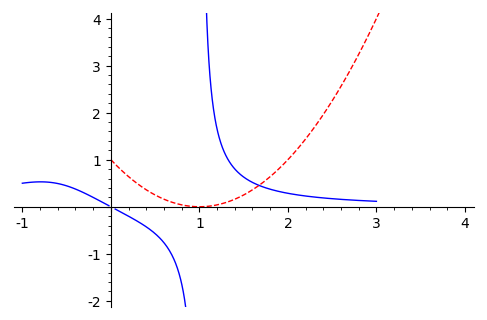

In [33]:
gf+gh

Con la orden show podemos añadir opciones nuevas a las gráficas, o modificar algunas de las que ya había:

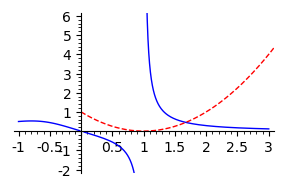

In [34]:
(gf+gh).show(ymax=6,xmax=3,figsize=3)

A continuación, añadimos a la gráfica anterior el dibujo del punto $(1,0)$ :

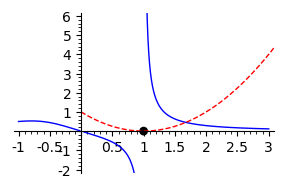

In [35]:
P=point([(1,0)], pointsize=40, color='black')
(gf+gh+P).show(ymax=6,xmax=3,figsize=3)

Acabamos con problemas típicos en los que Sage nos puede ayudar.

**Ejemplo 1:** Hallar el dominio de definición de la función $f(x)=\log\frac{1+x}{1-x}$. Dibujarla y estudiar si es par o impar. \**\**

In [36]:
reset()
solve((1+x)/(1-x)>0,x) # así, vemos que dominio f = (-1,1)

[[x > -1, x < 1]]

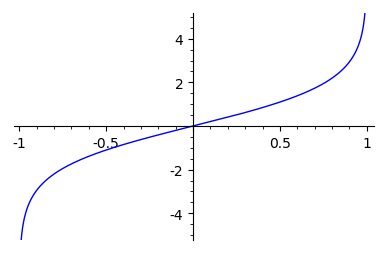

In [37]:
f(x)=log((1+x)/(1-x)) # parece que es impar
plot(f(x),x,-1,1,figsize=4,ymin=-5,ymax=5)

In [38]:
(f(x)+f(-x)).full_simplify()

log(-(x + 1)/(x - 1)) + log(-(x - 1)/(x + 1))

Sage no ve que la expresión anterior es $0$, pero es inmediato (usando $\log(a/b)=\log a  - \log b$).

**Ejemplo 2:** Sea la función $\displaystyle f(x)=\sin\frac{2\pi x}{3}+\cos\frac{\pi x}{2}$. A la vista de su gráfica, analizar si es periódica y encontrar el periodo más pequeño.

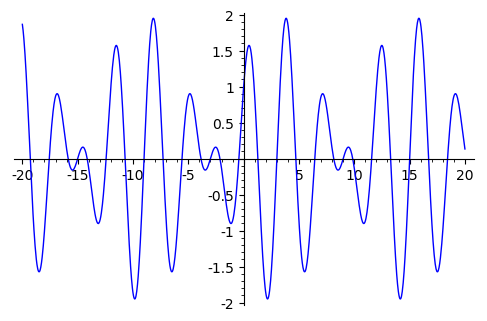

In [39]:
reset()
f(x)=sin(2*pi*x/3)+cos(pi*x/2)
plot(f(x),(x,-20,20),figsize=5)

Observando la gráfica se aprecia la periodicidad. Además parece que el periodo más pequeño es 12:

In [40]:
(f(x)-f(x+12)).full_simplify() # en efecto

0

**Ejemplo 3:** Sean las funciones $f(x)=x^2$, $g(x)=2^x$ y $h(x)=\sin x$. Escribir explícitamente como función de $x$ las expresiones: $(f\circ g)(x^2)$, $(g \circ f)(x)$, $(f\circ h)(x^3-2)$ y $(f\circ g\circ h)(x^2)$. \**\**

In [41]:
reset()
f(x)=x^2
g(x)=2^x
h(x)=sin(x)

In [42]:
show(f(g(x^2)).full_simplify())
show(g(f(x)))
show(f(h(x^3-2)))
show(f(g(h(x^2))).full_simplify())

2^(2*x^2)

2^(x^2)

sin(x^3 - 2)^2

2^(2*sin(x^2))

------------------------------------------------------------------------